In [1]:
from typing import Any

import matplotlib.pyplot as plt
import numpy as np

plt.style.use("default")

# 1. Basic Plotting


## Line Plots

A simple line plot of a sine wave:

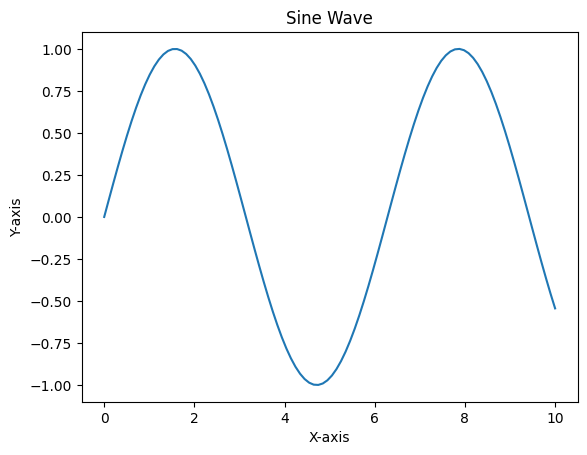

In [2]:
# Generate data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create the plot
plt.plot(x, y)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Sine Wave")

# Display the plot
plt.show()

## Scatter Plots
Creating a scatter plot with random data:

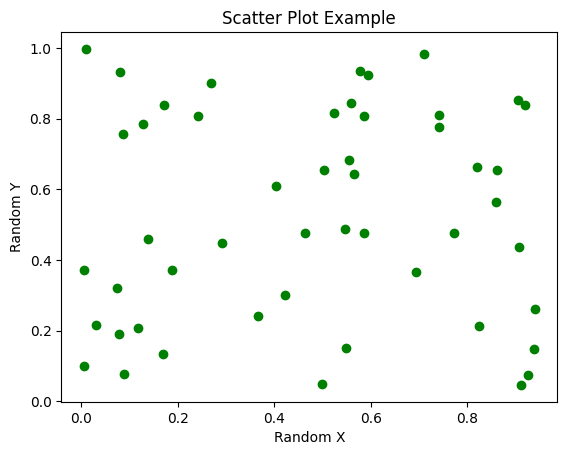

In [3]:
# Generate random data
x = np.random.rand(50)
y = np.random.rand(50)

# Create scatter plot
plt.scatter(x, y, color="green", marker="o")

# Add labels and title
plt.xlabel("Random X")
plt.ylabel("Random Y")
plt.title("Scatter Plot Example")

# Display the plot
plt.show()

## Bar Charts
Plotting categorical data using a bar chart:

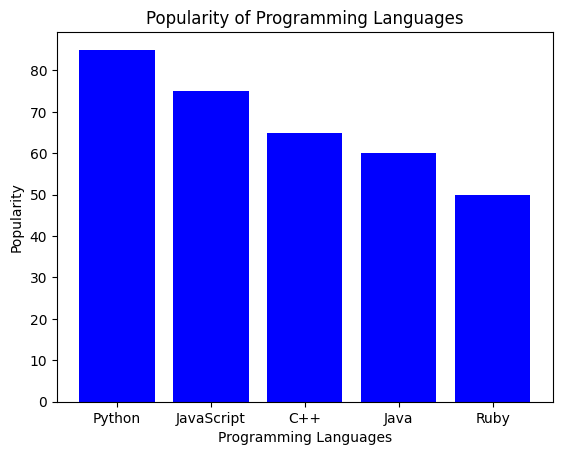

In [4]:
# Data
languages = ["Python", "JavaScript", "C++", "Java", "Ruby"]
popularity = [85, 75, 65, 60, 50]

# Create a bar chart
plt.bar(languages, popularity, color="blue")

# Add labels and title
plt.xlabel("Programming Languages")
plt.ylabel("Popularity")
plt.title("Popularity of Programming Languages")

# Display the plot
plt.show()

## Histograms

Visualizing the distribution of data with a histogram:

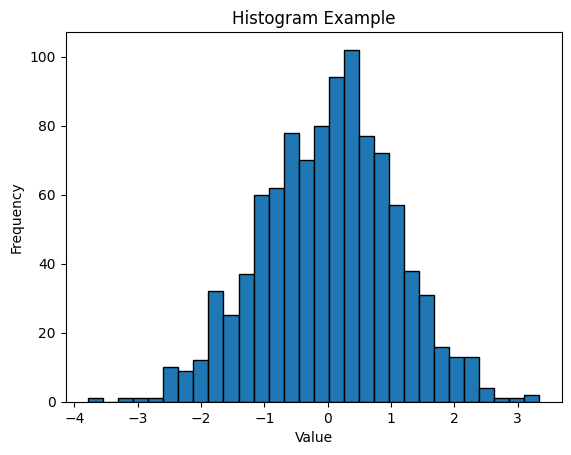

In [5]:
# Generate random data
data = np.random.randn(1000)

# Create histogram
plt.hist(data, bins=30, edgecolor="black")

# Add labels and title
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram Example")

# Display the plot
plt.show()

## Imshows


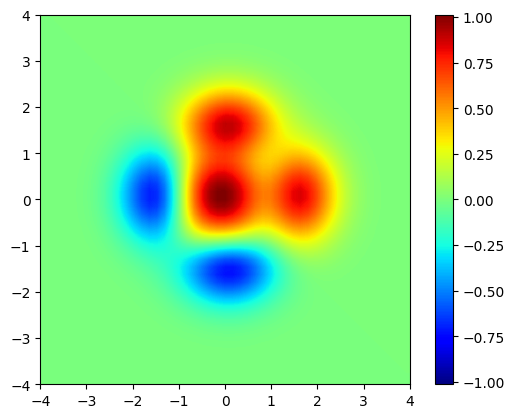

In [6]:
x = np.linspace(-4, 4, 50)
y = np.linspace(-4, 4, 50)
xx, yy = np.meshgrid(x, y)
zz = (1 - xx / 3.0 + xx**5 + yy**5) * np.exp(-(xx**2) - yy**2)
zz = zz[:-1, :-1]
z_min, z_max = -np.abs(zz).max(), np.abs(zz).max()

c = plt.imshow(
    zz,
    cmap="jet",
    vmin=z_min,
    vmax=z_max,
    extent=(x.min(), x.max(), y.min(), y.max()),
    interpolation="bilinear",
    origin="lower",
)
plt.colorbar(c)

# 2. Deep dive into the Matplotlib

To fully harness the power of Matplotlib, it’s essential to understand its object-oriented approach.

**Figures**, **Axes**, and **Artists**
- **Figure**: The overall window or page that everything is drawn on.
- **Axes**: The area on which data is plotted (a subplot). A Figure can have multiple Axes.
- **Axis**: The x and y (and potentially z) axis in a plot.
- **Artist**: Everything you see on the figure is an Artist (e.g., Line2D, Text, Rectangle).

## Customizing Figures and Axes step-by-step

### Single-axes figures

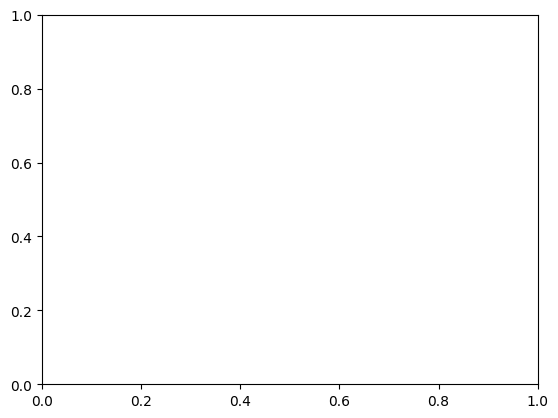

In [7]:
# Create figure with custom size and DPI
fig, ax = plt.subplots()

plt.show()

```python
def subplots(nrows: int = 1,
             ncols: int = 1,
             *,
             sharex: Literal["none", "all", "row", "col"] | bool = False,
             sharey: Literal["none", "all", "row", "col"] | bool = False,
             squeeze: bool = True,
             width_ratios: Sequence[float] | None = None,
             height_ratios: Sequence[float] | None = None,
             subplot_kw: dict[str, Any] | None = None,
             gridspec_kw: dict[str, Any] | None = None,
             **fig_kw: Any) -> tuple[Figure, Any]
```

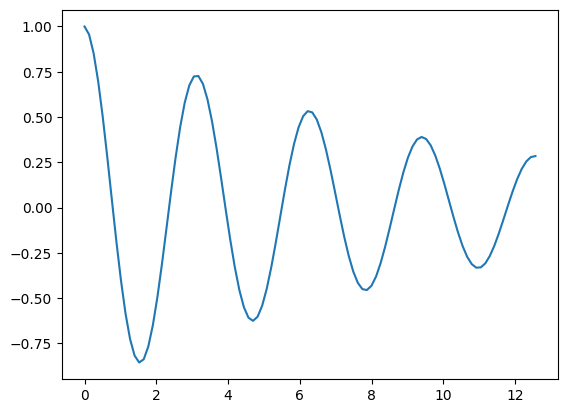

In [8]:
# Create a figure with custom size and DPI
fig, ax = plt.subplots()

x = np.linspace(0, 4 * np.pi, 100)
y = np.exp(-x / 10) * np.cos(x * 2)

ax.plot(x, y)
plt.show()

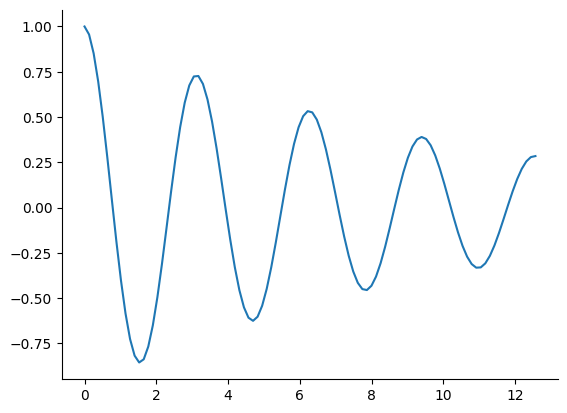

In [9]:
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# Hide all spines
# for spine in ax.spines.values():
#     spine.set_visible(False)

# Turn off axis lines and labels using axis('off').
# ax.axis('off')

fig

### Multi-axes figures

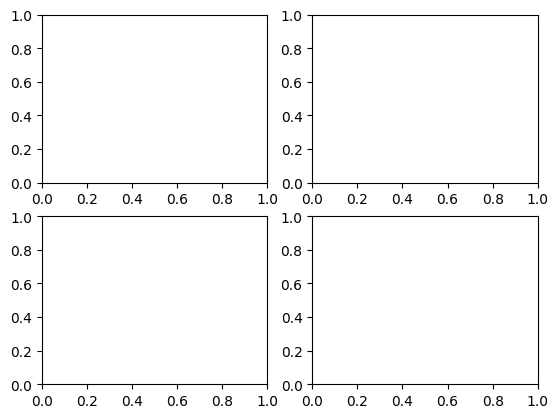

In [10]:
# Create a figure with custom size and DPI
fig, axs = plt.subplots(2, 2)

plt.show()

[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


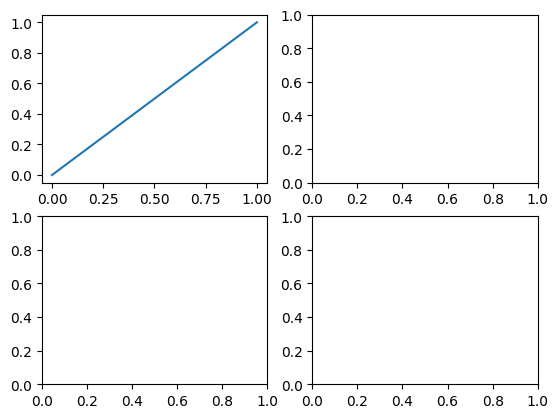

In [11]:
print(axs)

axs[0][0].plot([0, 1], [0, 1])
fig

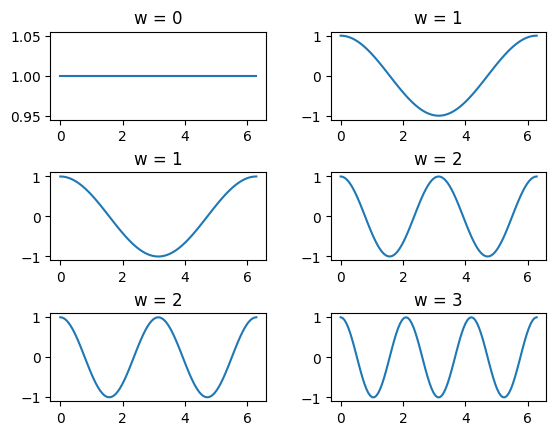

In [12]:
def plot_sin(ax_var: plt.Axes, w: float) -> Any:
    x = np.linspace(0, 2 * np.pi, 100)
    ax_var.plot(x, np.cos(w * x))


m, n = 3, 2
fig, axs = plt.subplots(m, n)

# Automatically adjust subplot parameters for a clean layout
# fig.tight_layout()

# Or manually adjust
fig.subplots_adjust(hspace=0.6, wspace=0.3)

for i in range(m):
    for j in range(n):
        plot_sin(axs[i, j], i + j)
        axs[i, j].set_title(f"w = {i + j}")

plt.show()

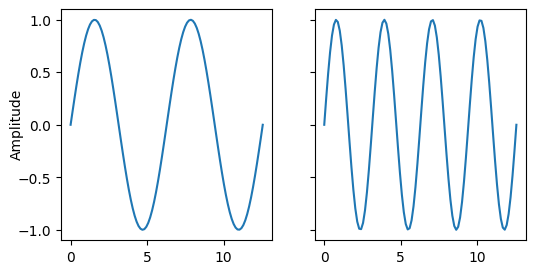

In [13]:
# Create subplots with shared y-axis
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 3))

axes[0].plot(x, np.sin(x))
axes[1].plot(x, np.sin(2 * x))

# Set common y-axis label
fig.text(0.04, 0.5, "Amplitude", va="center", rotation="vertical")

plt.show()

### Adding secondary axis

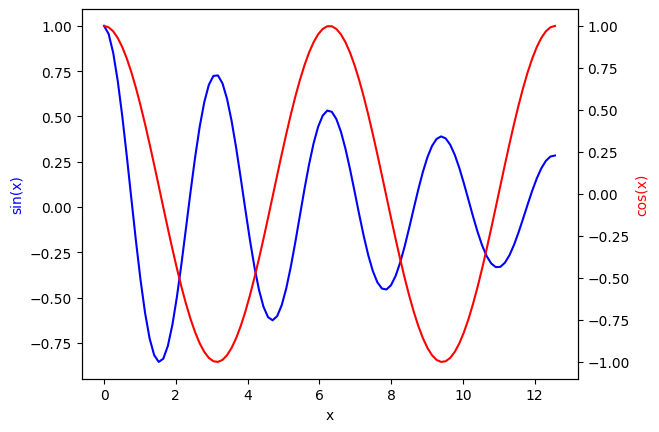

In [14]:
# Create a new figure and axes
fig, ax1 = plt.subplots()

# Plot on the first axes
ax1.plot(x, y, color="blue")
ax1.set_xlabel("x")
ax1.set_ylabel("sin(x)", color="blue")

# Create a twin of the axes that shares the x-axis
ax2 = ax1.twinx()

# Plot on the second axes
ax2.plot(x, np.cos(x), color="red")
ax2.set_ylabel("cos(x)", color="red")

plt.show()

### GridSpec Layours

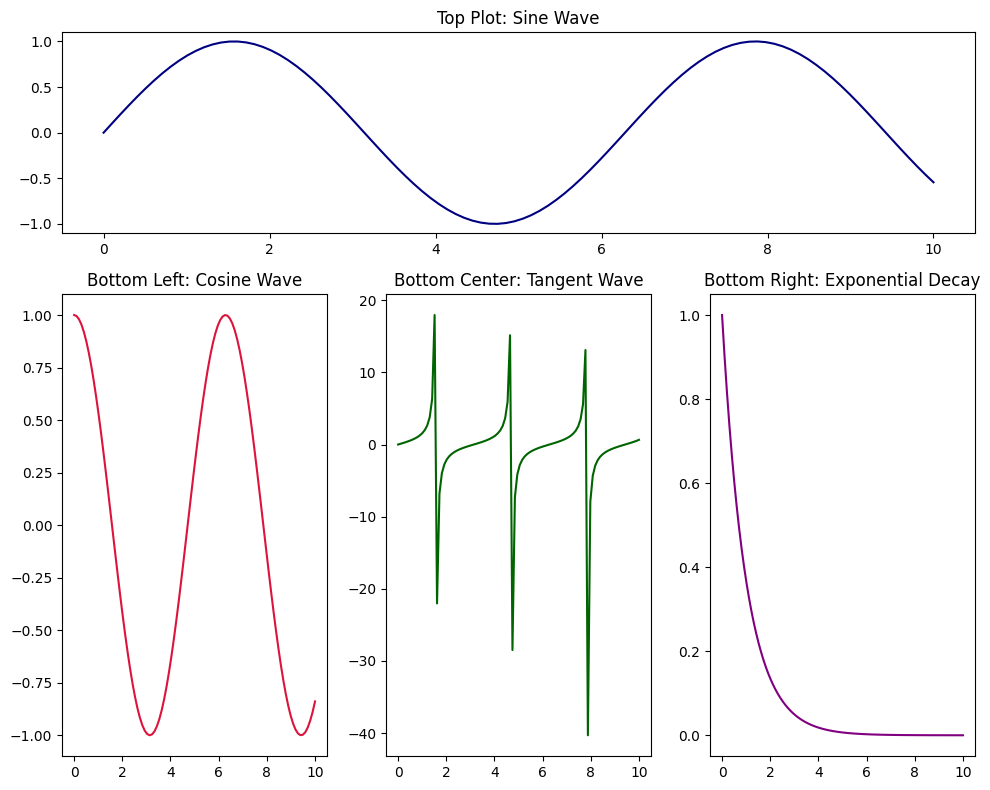

In [15]:
import matplotlib.gridspec as gridspec

# Create data
x = np.linspace(0, 10, 100)

# Create subplots
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(3, 3)

# Top plot spanning all columns
ax_top = fig.add_subplot(gs[0, :])
ax_top.plot(x, np.sin(x), color="navy")
ax_top.set_title("Top Plot: Sine Wave")

# Bottom left plot
ax_bl = fig.add_subplot(gs[1:, 0])
ax_bl.plot(x, np.cos(x), color="crimson")
ax_bl.set_title("Bottom Left: Cosine Wave")

# Bottom center plot
ax_bc = fig.add_subplot(gs[1:, 1])
ax_bc.plot(x, np.tan(x), color="darkgreen")
ax_bc.set_title("Bottom Center: Tangent Wave")

# Bottom right plot
ax_br = fig.add_subplot(gs[1:, 2])
ax_br.plot(x, np.exp(-x), color="purple")
ax_br.set_title("Bottom Right: Exponential Decay")

# Adjust layout
fig.tight_layout()

# Display the plots
plt.show()

plt.show()

### Modifying Figure Size and DPI


In [16]:
x = np.random.randn(100)
y = np.random.randn(100)

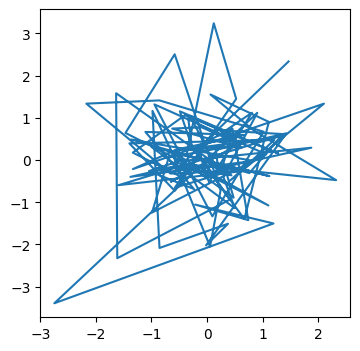

In [17]:
# Create figure with custom size and DPI
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)

# Plot data
ax.plot(x, y)

# Display the plot
plt.show()

### Adjusting Axes Limits and Scales

[0.1        0.12915497 0.16681005 0.21544347 0.27825594 0.35938137
 0.46415888 0.59948425 0.77426368 1.        ]


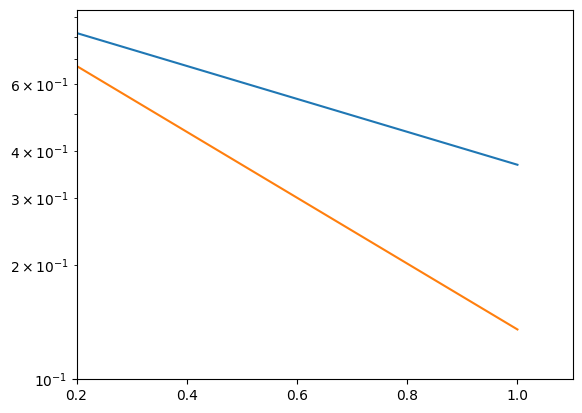

In [18]:
# Create plot
fig, ax = plt.subplots()

# Plot data
x = np.logspace(-1, 0, 10)
print(x)

ax.plot(x, np.exp(-x))
ax.plot(x, np.exp(-2 * x))

# Set axes limits
ax.set_xlim(0.2, 1.1)
ax.set_ylim(1e-1, None)

# Set axes scales
ax.set_yscale("log")  # Options: 'linear', 'log', (and others, such as 'symlog' or 'logit')

# Display the plot
plt.show()

### Adding Titles, Labels, and Legends

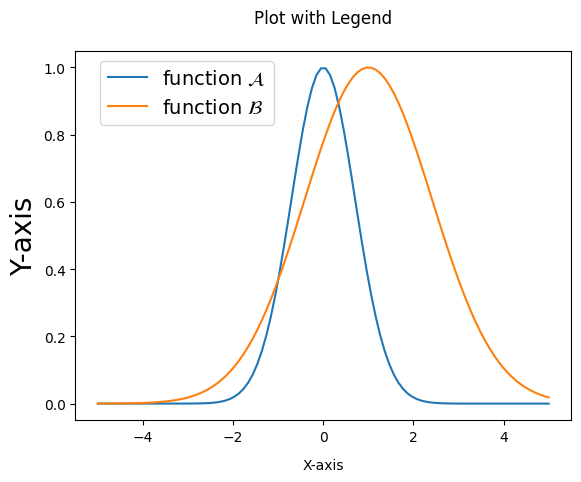

In [19]:
# Create plot
fig, ax = plt.subplots()

# Plot data with a label

x = np.linspace(-5, 5, 100)

ax.plot(x, np.exp(-(x**2)), label=r"function $\mathcal{A}$")
ax.plot(x, np.exp(-((x - 1) ** 2) / 4), label=r"function $\mathcal{B}$")

# Add labels and title
ax.set_xlabel("X-axis", labelpad=10)
ax.set_ylabel("Y-axis", fontsize=20)
ax.set_title("Plot with Legend", pad=20)

# Add legend
# ax.legend(loc='upper right')
ax.legend(loc=(0.05, 0.8), fontsize=14)

# Display the plot
plt.show()

### Customizing Ticks and Grids

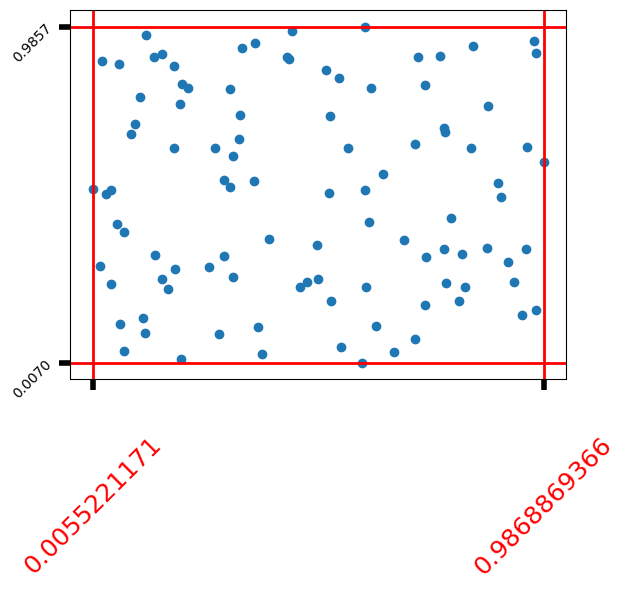

In [20]:
from matplotlib.ticker import StrMethodFormatter

# Create plot
fig, ax = plt.subplots()

# Plot data

np.random.seed(42)
x = np.random.rand(100)
y = np.random.rand(100)

ax.scatter(x, y)

# Customize ticks
# ax.set_xticks(np.random.choice(x, size=3))
# ax.set_yticks(np.random.choice(y, size=3))
ax.set_xticks([min(x), max(x)])
ax.set_yticks([min(y), max(y)])

# ax.tick_params(axis='x', direction='in', length=5, width=1, colors='red')
ax.yaxis.set_tick_params(rotation=45, length=8, width=4)
ax.xaxis.set_tick_params(
    rotation=45,
    length=8,
    width=4,
    labelcolor="r",
    labelsize=18,
    pad=30,
)
ax.xaxis.set_major_formatter(StrMethodFormatter("{x:,.10f}"))

# Add grid
ax.grid(
    visible=True,
    which="both",
    color="r",
    linestyle="-",
    linewidth=2,
)

# Display the plot
plt.show()

### Applying Styles

In [21]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


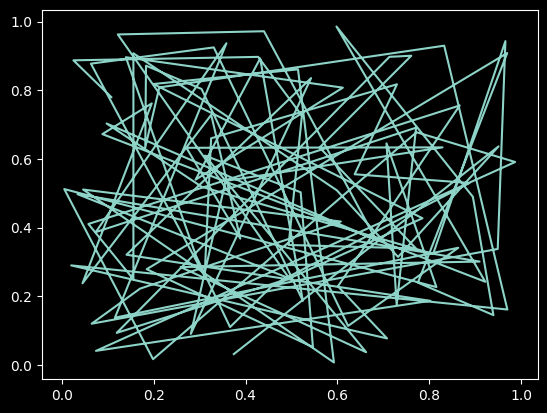

In [22]:
# Use 'seaborn' style
# plt.style.use('default')
plt.style.use("dark_background")

# Create plot
fig, ax = plt.subplots()
ax.plot(x, y)

# Display the plot
plt.show()

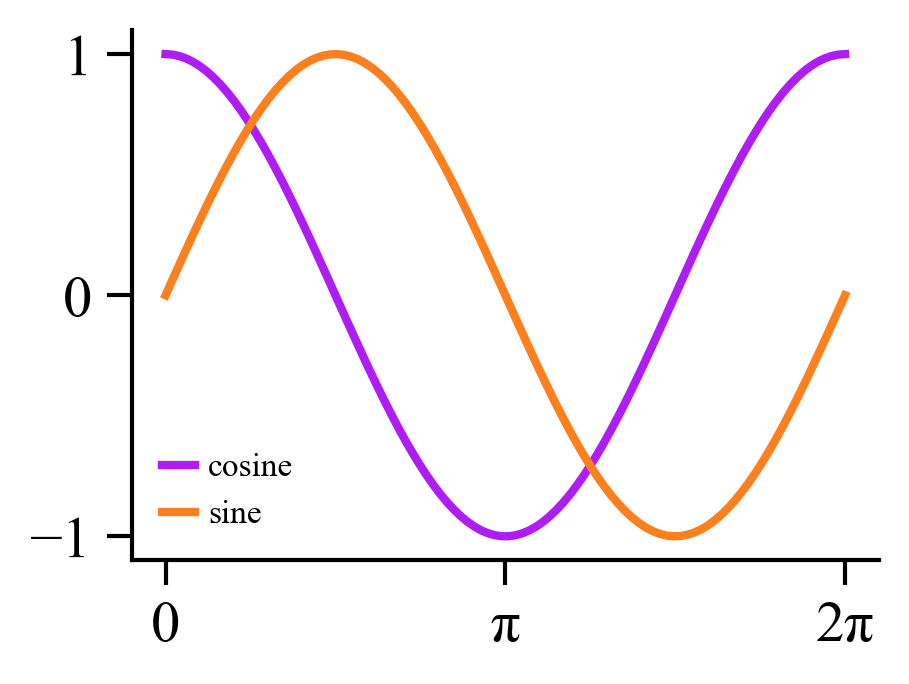

In [23]:
# Use 'seaborn' style
# plt.style.use('default')
plt.style.use("visualization/custom_style_white.mplstyle")

# Create plot
fig, ax = plt.subplots()

x = np.linspace(0, 2 * np.pi, 100)
ax.plot(x, np.cos(x), lw=2, label="cosine")
ax.plot(x, np.sin(x), lw=2, label="sine")

# Customize ticks
ax.set_xticks([0, np.pi, 2 * np.pi])
ax.set_xticklabels(["0", "π", "2π"])

ax.legend()


fig.savefig("visualization/figures/awesome_figure.pdf", dpi=300, bbox_inches="tight")
# Display the plot
plt.show()

```python
savefig(fname, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
```

## Advanced Plot Customizations


### Annotations and Text


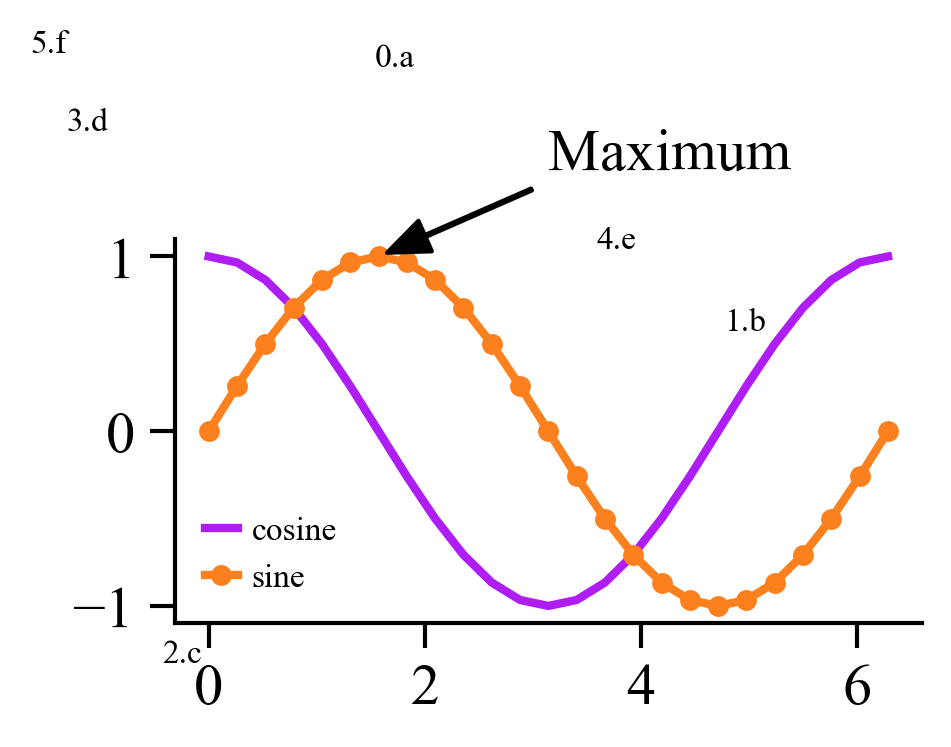

In [24]:
# Create plot
fig, ax = plt.subplots()

x = np.linspace(0, 2 * np.pi, 25)
ax.plot(x, np.cos(x), lw=2, label="cosine")
ax.plot(x, np.sin(x), lw=2, label="sine", linestyle="-", marker="o")
ax.legend()

# Annotate a point
ax.annotate(
    "Maximum",
    xy=(np.pi / 2, 1),
    xytext=(np.pi, 1.5),
    arrowprops=dict(
        facecolor="black",
        edgecolor="black",
        width=0.5,
        headlength=10,
        headwidth=8,
        shrink=0.05,
    ),
)

np.random.seed(42)
for i, text in enumerate("abcdef"):
    x_i, y_i = np.random.rand(2)
    transform = fig.transFigure  # or ax.transData or ax.transAxes and more
    ax.text(x_i, y_i, s=f"{i}.{text}", transform=transform, fontsize=8)

# Display the plot
plt.show()

width – The width of the arrow in points

headwidth – The width of the base of the arrow head in points

headlength – The length of the arrow head in points

shrink – Fraction of total length to shrink from both ends

### Insets


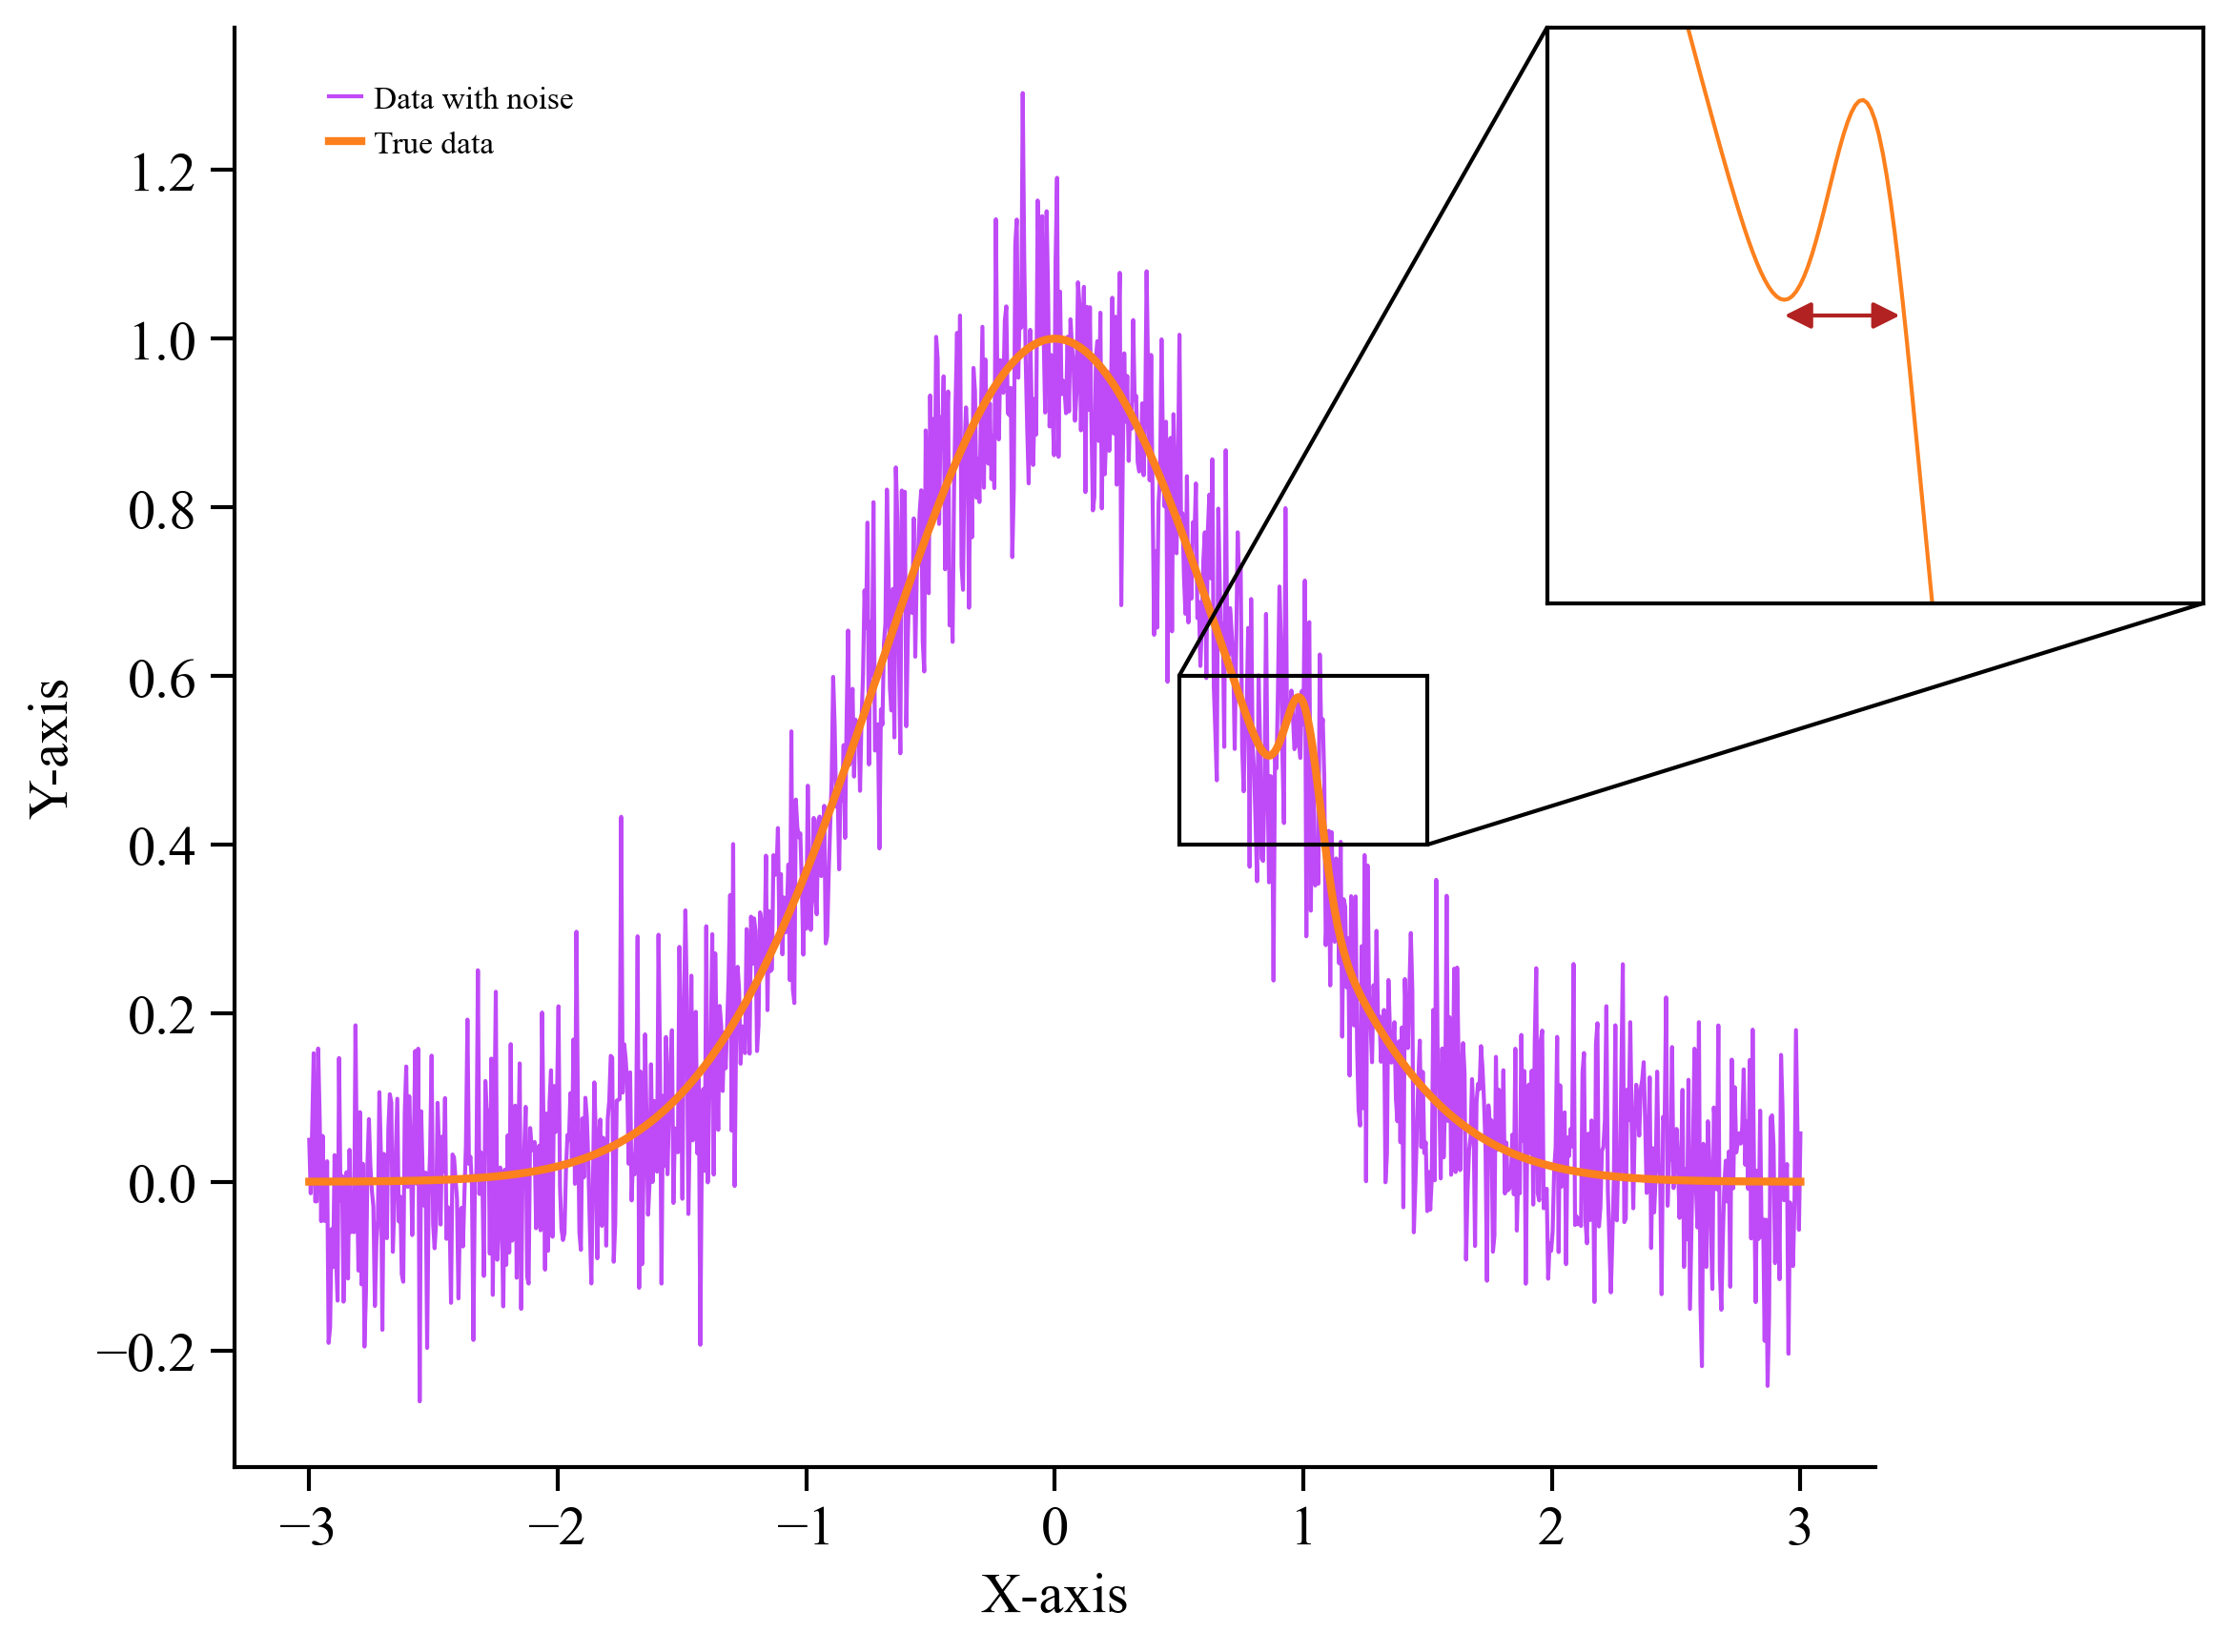

In [25]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Generate sample data
np.random.seed(42)
x = np.linspace(-3, 3, 1000)
y_true = np.exp(-(x**2)) + np.exp(-((x - 1) ** 2) * 100) / 5
y = y_true + np.random.randn(len(x)) / 10

# Create the main plot
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, label="Data with noise", alpha=0.8)
(true_line,) = ax.plot(x, y_true, label="True data", lw=2)

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.legend(loc=(0.05, 0.9))

# Define the region to zoom in
x1, x2 = 0.5, 1.5  # X-axis limits for the zoomed region
y1, y2 = 0.4, 0.6  # Y-axis limits for the zoomed region

# Create an inset axes for the zoomed region
axins = ax.inset_axes(
    [0.8, 0.6, 0.4, 0.4],
    xlim=(x1, x2),
    ylim=(y1, y2),
    transform=ax.transAxes,
)

color = true_line.get_color()  # "#FC801D"
axins.plot(x, y_true, color=color)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# Remove tick labels from the inset axes
axins.set_xticks([])
axins.set_yticks([])

axins.spines["right"].set_visible(True)
axins.spines["top"].set_visible(True)

axins.annotate(
    r"",
    xy=(1.05, 0.5),
    xytext=(0.85, 0.5),
    xycoords="data",
    textcoords="data",
    arrowprops=dict(
        arrowstyle="<|-|>",
        color="firebrick",
        lw=1,
        ls="-",
    ),
)

# Draw a rectangle on the main plot to indicate the zoomed area
mark_inset(ax, axins, loc1=2, loc2=4, zorder=2, edgecolor="k")
fig.savefig("visualization/figures/awesome_figure_with_inset.pdf", dpi=300, bbox_inches="tight", transparent=True)

plt.show()